In [54]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv("AirlineTweets.csv")
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

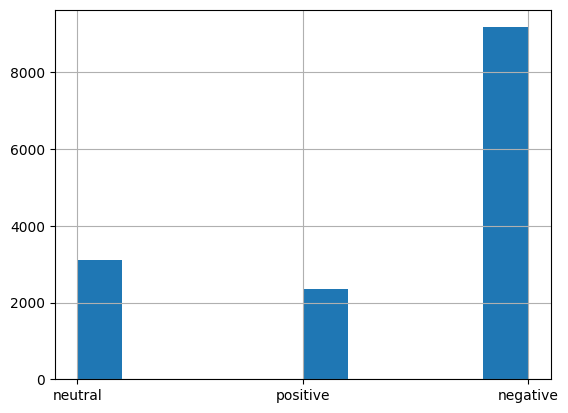

In [56]:
df["airline_sentiment"].hist()

In [57]:
df = df[['airline_sentiment', 'text']]
#asignar un valor dado otro valor con función map
target_map = {'positive':1, 'neutral':2, 'negative':0}
#nueva columna
df['target'] = df['airline_sentiment'].map(target_map)
df.head(5)

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


split

In [58]:
dfTrain, dfTest = train_test_split(df)

In [59]:
from nltk.corpus import stopwords

In [64]:

# Load the stopwords
stop_words = stopwords.words('english')

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000, stop_words=stop_words)

In [65]:
x_train = vectorizer.fit_transform(dfTrain['text'])
x_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 92329 stored elements in Compressed Sparse Row format>

In [67]:
x_test = vectorizer.fit_transform(dfTrain['text'])
x_test

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 92329 stored elements in Compressed Sparse Row format>

In [68]:
Y_train = dfTrain['target']
Y_test = dfTrain['target']

In [70]:
from sklearn.model_selection import GridSearchCV
# Define the parameters to test
parameters = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create a logistic regression model
logistic = LogisticRegression(max_iter=500)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic, parameters, cv=5)
grid_search.fit(x_train, Y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_logistic = LogisticRegression(max_iter=500, C=best_params['C'], penalty=best_params['penalty'])
best_logistic.fit(x_train, Y_train)

# Test the model
accuracy = best_logistic.score(x_test, Y_test)
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")
print(f"Accuracy on test set: {accuracy}")

C:\Users\matts\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\matts\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.775591985428051
Accuracy on test set: 0.8435336976320583


In [73]:
# Train the model with the best parameters
best_logistic = LogisticRegression(max_iter=500, C=best_params['C'], penalty=best_params['penalty'])
best_logistic.fit(x_train, Y_train)


LogisticRegression(C=1, max_iter=500)

In [74]:
Pr_train = best_logistic.predict_proba(x_train)#[:, 1]
Pr_test = best_logistic.predict_proba(x_test)#[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9363097830879573
Test AUC: 0.9363097830879573


In [76]:
P_train = best_logistic.predict(x_train)
P_test = best_logistic.predict(x_test)

In [77]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.95948889, 0.00914767, 0.03136344],
       [0.19683258, 0.70644796, 0.09671946],
       [0.33935484, 0.05634409, 0.60430108]])

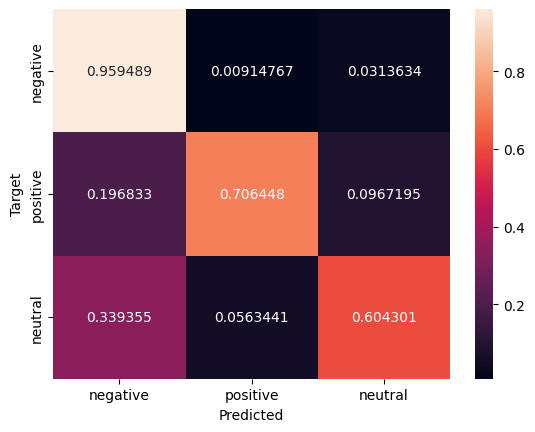

In [78]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

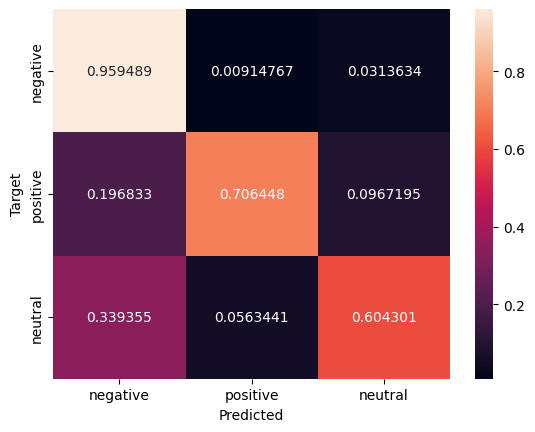

In [79]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [80]:

word_index_map = vectorizer.vocabulary_
word_index_map


{'united': 1859,
 'change': 345,
 'made': 1105,
 'hours': 908,
 'something': 1639,
 'taken': 1730,
 'seconds': 1563,
 'online': 1259,
 'loved': 1094,
 'agent': 113,
 'though': 1765,
 'door': 576,
 'half': 845,
 'plane': 1343,
 'seat': 1557,
 'forced': 765,
 'always': 140,
 'sit': 1612,
 'americanair': 144,
 '11': 7,
 'delayed': 517,
 'flights': 746,
 'suck': 1701,
 'getting': 812,
 'worse': 1970,
 'fair': 680,
 'usairways': 1877,
 'stuck': 1696,
 'need': 1209,
 'reflight': 1452,
 'booking': 274,
 'problems': 1391,
 'next': 1217,
 'flight': 735,
 'possibly': 1371,
 'dm': 568,
 'info': 953,
 '30': 41,
 'departure': 532,
 'sure': 1715,
 'catering': 331,
 'jfk': 986,
 'http': 915,
 'co': 390,
 'southwestair': 1651,
 'got': 831,
 'help': 875,
 'nice': 1219,
 'lady': 1015,
 'phone': 1326,
 'thank': 1754,
 'refund': 1453,
 'vouchers': 1900,
 'another': 154,
 'different': 550,
 'airline': 123,
 'today': 1785,
 'hour': 907,
 'drive': 583,
 'inconvenient': 948,
 'site': 1613,
 'clearly': 378,
 '

In [86]:
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = best_logistic.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most positive words:
southwestair -2.2110025123387804
thank -3.9598917704063603
thanks -3.794429855979566
virginamerica -2.5921057745743616
jetblue -2.37398794713933
love -2.3025826209343867
amazing -2.263404299922144


In [88]:
print("Most negative  words:")
for word, index in word_index_map.items():
    weight = best_logistic.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most negative  words:
hours 2.9397972265391616
delayed 2.616844566719496
stuck 2.2423797974223745
hour 2.2538503832906627
cancelled 2.3931333416874283
delay 2.326952725081342
nothing 2.056210111901114
worst 3.100660683781474
hold 2.6320621230079064
luggage 2.333454679916855
lost 2.10240934613628
